Rin Liao
Video Game Ratings from the Past Decade
Dataset: https://www.kaggle.com/datasets/nyagami/video-game-ratings-from-imdb?resource=download
For this project I decided to compare data of games released from 2012-2022, focusing on the ratings and genres to determine any potential trends. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
!pip install wordcloud
from wordcloud import WordCloud

vid_gam= pd.read_csv("imdb_video_game_rating.csv", low_memory=False)
vid_gam

,Unnamed: 0,title,year,genre,rating,votes,directors,plot
0,0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...,...
12630,12633,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,12634,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,12635,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,12636,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


In [2]:
vid_gam.drop(labels=["Unnamed: 0","directors","plot"],axis=1, inplace=True)
vid_gam

,title,year,genre,rating,votes
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601
1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441"
2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610"
3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328"
4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103"
...,...,...,...,...,...
12630,Superman,1999,"Action, Adventure, Family",1.4,646
12631,Action 52,1991,"Action, Family, Fantasy",1.3,135
12632,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338
12633,Animal Soccer World,2005,"Animation, Sport",1.2,125


In [3]:
# I wanted to see the number of games released per year to see how much data I would be working with. Turns out there are a few non year values in the dataset

game_year={}

for i in vid_gam["year"]:
    if i not in game_year:
        game_year[i]=1
    else:
        game_year[i]+=1
game_year

{'2022': 123,
 '2018': 422,
 '2016': 427,
 '2015': 432,
 '2013': 424,
 '2021': 263,
 '2019': 407,
 '1998': 296,
 '2017': 454,
 '2010': 372,
 '2020': 339,
 '2005': 419,
 '2004': 380,
 '2003': 407,
 '1995': 260,
 '1997': 262,
 '2011': 352,
 '2009': 366,
 '2008': 346,
 '2001': 368,
 '2000': 371,
 '1999': 358,
 '2007': 352,
 '2014': 383,
 '1991': 232,
 '1990': 209,
 '1994': 302,
 '2012': 392,
 '2002': 396,
 '1988': 145,
 '2006': 385,
 '1996': 296,
 '1993': 265,
 '1992': 235,
 '1989': 171,
 '1985': 95,
 'I)': 61,
 '1986': 115,
 'II)': 34,
 'III)': 6,
 '1987': 151,
 '1984': 111,
 '1983': 106,
 '1975': 8,
 '1982': 96,
 '1981': 64,
 'Video': 1,
 '1980': 58,
 '1969': 2,
 '1971': 4,
 '1972': 16,
 '1978': 20,
 '1976': 13,
 '1974': 6,
 '1979': 28,
 '1948': 1,
 '1977': 17,
 '1952': 1,
 '1958': 1,
 'IV)': 1,
 '1962': 1,
 '1973': 6,
 '1970': 1}

In [4]:
#removing the unwanted values from the dataframe
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

keys="I)","II)","III)","Video","IV)"
for key in keys:
    vid_gam.drop(vid_gam.loc[vid_gam["year"]==key].index,inplace=True)
vid_gam.sort_values("year",ascending=False)

,title,year,genre,rating,votes
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601
206,Salt and Sacrifice,2022,Action,8.9,7
146,Triangle Strategy,2022,"Action, Adventure, Fantasy",9.0,58
2285,Crowns and Pawns: Kingdom of Deceit,2022,Adventure,8.0,15
154,The Stanley Parable: Ultra Deluxe,2022,"Adventure, Comedy, Fantasy",9.0,199
...,...,...,...,...,...
3648,Space Travel,1969,Sci-Fi,7.7,9
8002,Spacewar!,1962,"Action, Sci-Fi",6.8,50
7182,Tennis for Two,1958,Sport,7.0,40
6916,OXO,1952,Action,7.0,22


In [5]:
#narrowing the data down to 2012-2022
#https://datatofish.com/string-to-integer-dataframe/

vid_gam["year"]=vid_gam["year"].astype(int)
vid_gam.drop(vid_gam[(vid_gam["year"]<2012)].index,inplace=True)
vid_gam.drop(vid_gam[(vid_gam["year"]>2022)].index,inplace=True)
vid_gam.sort_values("year",ascending=False)

,title,year,genre,rating,votes
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601
4577,Far Cry 6: The Vanishing,2022,"Action, Adventure, Horror",7.5,16
4587,FAR: Changing Tides,2022,"Action, Adventure",7.5,45
532,Rogue Legacy 2,2022,"Action, Adventure",8.6,9
4607,MultiVersus,2022,"Action, Fantasy, Sci-Fi",7.5,298
...,...,...,...,...,...
4504,BlazBlue: Chrono Phantasma,2012,"Action, Fantasy, Sci-Fi",7.5,54
4510,The Silent Age,2012,"Adventure, Mystery, Sci-Fi",7.5,74
11525,Dragon Quest X: Awakening of the Five Tribes,2012,"Action, Adventure, Family",5.2,11
11519,Datura,2012,"Adventure, Mystery",5.2,25


{2022: 123, 2018: 422, 2016: 427, 2015: 432, 2013: 424, 2021: 263, 2019: 407, 2017: 454, 2020: 339, 2014: 383, 2012: 392}


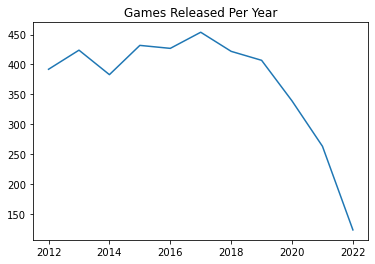

In [49]:
#graphing the number of games released each year 
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values

game_year={}

for i in vid_gam["year"]:
    if i not in game_year:
        game_year[i]=1
    else:
        game_year[i]+=1
        
year_release=sorted(game_year.items())
x,y=zip(*year_release)
plt.plot(x,y)
plt.title("Games Released Per Year")
plt.show
print(game_year)

In [104]:
def title_released():
    user_year= int(input("Pick a year from 2012 to 2022: "))
    print("There were "+str(game_year[user_year])+" games released")
        
title_released()

Pick a year from 2012 to 2022: 2016
There were 427 games released


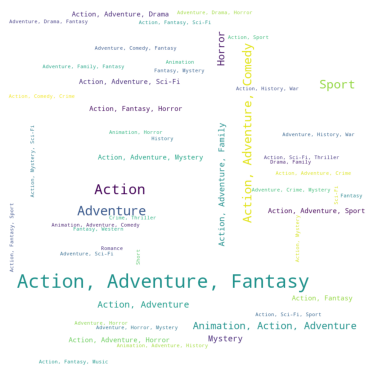

{'Action, Adventure, Drama': 2,
 'Action, Adventure, Fantasy': 21,
 'Action, Adventure, Mystery': 2,
 'Adventure, Family, Fantasy': 1,
 'Mystery': 3,
 'Adventure, Comedy, Fantasy': 1,
 'Action, Adventure, Comedy': 8,
 'Action': 10,
 'History': 1,
 'Horror': 5,
 'Short': 1,
 'Adventure, Horror': 1,
 'Animation, Action, Adventure': 5,
 'Action, Adventure': 4,
 'Adventure, Crime, Mystery': 1,
 'Romance': 1,
 'Action, Fantasy, Horror': 2,
 'Adventure, Sci-Fi': 1,
 'Adventure, History, War': 1,
 'Action, Adventure, Family': 3,
 'Adventure': 9,
 'Action, Sci-Fi, Sport': 1,
 'Crime, Thriller': 1,
 'Action, Fantasy': 2,
 'Action, Adventure, Sci-Fi': 2,
 'Action, Mystery, Sci-Fi': 1,
 'Animation, Horror': 1,
 'Adventure, Drama, Fantasy': 1,
 'Sci-Fi': 1,
 'Action, Fantasy, Music': 1,
 'Action, Adventure, Horror': 2,
 'Animation, Adventure, Comedy': 1,
 'Action, Sci-Fi, Thriller': 1,
 'Action, Fantasy, Sci-Fi': 1,
 'Action, Sport': 1,
 'Animation, Adventure, History': 1,
 'Action, Mystery': 1,
 

In [97]:
#seeing the frequency of game genres by using a word cloud 

genres={}

for i in vid_gam["genre"]:
    if i not in genres:
        genres[i]=1
    else:
        genres[i]+=1
        

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = "white",
                      min_font_size=10).generate_from_frequencies(genres)
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
genres

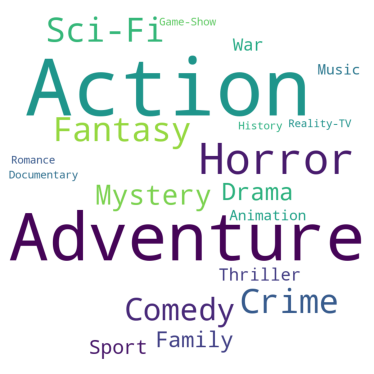

{'Action': 88, 'Adventure': 71, 'Crime': 12, 'Horror': 22, 'Sci-Fi': 12, 'Fantasy': 12, 'Sport': 4, 'Mystery': 8, 'Comedy': 10, 'Family': 5, 'Thriller': 3, 'Drama': 6, 'War': 3, 'Romance': 1, 'Animation': 2, 'Music': 2, 'Game-Show': 1, 'Western': 0, 'History': 1, 'Documentary': 1, 'Reality-TV': 1}


In [8]:
#separating the data from the last cell into individual genres 

gen_count={"Action":0,"Adventure":0,"Crime":0,"Horror":0,"Sci-Fi":0,"Fantasy":0,"Sport":0,"Mystery":0,"Comedy":0,"Family":0,"Thriller":0,"Drama":0,"War":0,"Romance":0,"Animation":0,"Music":0,"Game-Show":0,"Western":0,"History":0,"Documentary":0,"Reality-TV":0}

gen_names=genres.keys()

for gen_names in genres:
    if "Act" in gen_names:
        gen_count["Action"]+=1
    elif "Adv" in gen_names:
        gen_count["Adventure"]+=1
    elif "Cri" in gen_names:
        gen_count["Crime"]+=1
    elif "Hor" in gen_names:
        gen_count["Horror"]+=1
    elif "Sci" in gen_names:
        gen_count["Sci-Fi"]+=1
    elif "Fant" in gen_names:
        gen_count["Fantasy"]+=1
    elif "Spo" in gen_names:
        gen_count["Sport"]+=1
    elif "Mys" in gen_names:
        gen_count["Mystery"]+=1
    elif "Com" in gen_names:
        gen_count["Comedy"]+=1
    elif "Fam" in gen_names:
        gen_count["Family"]+=1
    elif "Thr" in gen_names:
        gen_count["Thriller"]+=1
    elif "Dra" in gen_names:
        gen_count["Drama"]+=1
    elif "War" in gen_names:
        gen_count["War"]+=1
    elif "Rom" in gen_names:
        gen_count["Romance"]+=1
    elif "Ani" in gen_names:
        gen_count["Animation"]+=1
    elif "Mus" in gen_names:
        gen_count["Music"]+=1
    elif "Gam" in gen_names:
        gen_count["Game-Show"]+=1
    elif "Wes" in gen_names:
        gen_count["Western"]+=1
    elif "His" in gen_names:
        gen_count["History"]+=1
    elif "Doc" in gen_names:
        gen_count["Documentary"]+=1
    elif "Rea" in gen_names:
        gen_count["Reality-TV"]+=1
        
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = "white",
                      min_font_size=10).generate_from_frequencies(gen_count)
plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
print(gen_count)

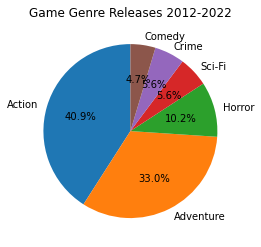

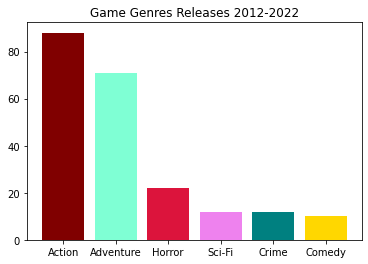

In [105]:
#top 6 genres
gen_top= {"Action":88, "Adventure":71,"Horror":22, "Sci-Fi": 12, "Crime": 12, "Comedy": 10}

#creating a pie chart 
labels=gen_top.keys()
numbers=gen_top.values()
fig1, ax1=plt.subplots()
ax1.pie(numbers, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Game Genre Releases 2012-2022")
plt.show()

#creating a bar graph
x=gen_top.keys()
y=gen_top.values()
plt.bar(x,y,color=["maroon","aquamarine","crimson","violet","teal","gold"])
plt.title("Game Genres Releases 2012-2022")
plt.show()

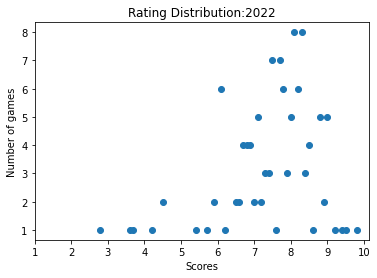

In [86]:
#I decided to look at the ratings for games released in only 2022
#https://www.w3schools.com/python/matplotlib_scatter.asp
#https://www.statology.org/pandas-scatter-plot/

vid_gam["year"]=vid_gam["year"].astype(int)
vid_gam.drop(vid_gam[(vid_gam["year"]<2022)].index,inplace=True)
vid_gam.drop(vid_gam[(vid_gam["year"]>2022)].index,inplace=True)
vid_gam.sort_values("year",ascending=False)

rate={}

for i in vid_gam["rating"]:
    if i not in rate:
        rate[i]=1
    else:
        rate[i]+=1

plt.scatter(rate.keys(),rate.values())
plt.title("Rating Distribution:2022")
plt.ylabel("Number of games")
plt.xlabel("Scores")
plt.xticks(np.arange(1,11))
plt.show()

In [46]:
class Goty:
    def __init__(self, year, name):
        self.year=str(year)
        self.name=name
    def award(self):
        print(self.name+" won the "+ self.year+ " Game of the Year Award.")
        
eldr= Goty(2022, "Elden Ring") 
itt= Goty(2021,"It Takes Two")
lou= Goty(2020, "The Last of Us Part II")

eldr.award()

Elden Ring won the 2022 Game of the Year Award.
